# **Airbnb Price Prediction – New York City**

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost folium

# **Import Libraries & Load Dataset**

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/path/to/your/kaggle.json/directory"

In [4]:
import kagglehub

# Download the dataset (automatically uses kaggle.json credentials)
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Load dataset
csv_path = os.path.join(path, "AB_NYC_2019.csv")
df = pd.read_csv(csv_path)  # You can also Download from: http://insideairbnb.com/get-the-data.html
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Data Cleaning**

In [10]:
# Drop rows with missing values
df = df.dropna(subset=['name', 'host_name', 'last_review'])

# Remove extreme price outliers
df = df[df['price'] < 500]

# Drop unused columns
df = df.drop(['id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1)

# Encode categorical features
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
df['room_type'] = df['room_type'].astype('category').cat.codes

# **Exploratory Data Analysis**

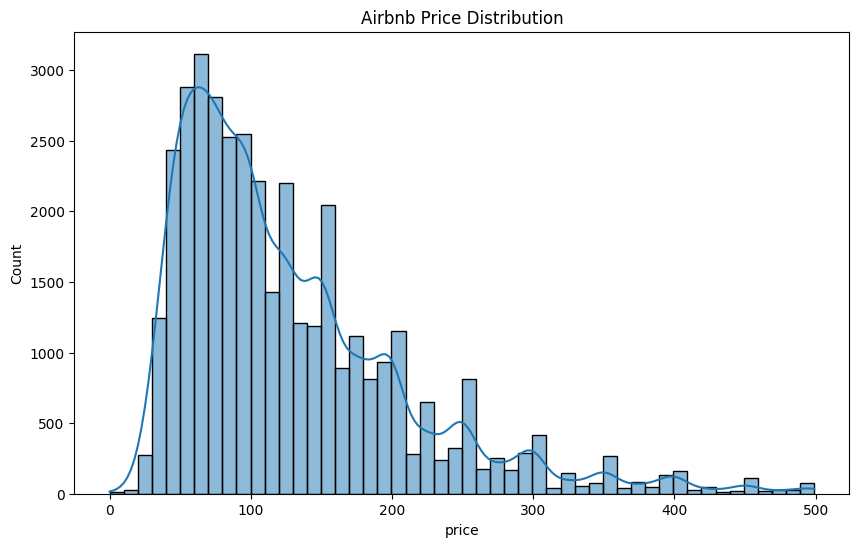

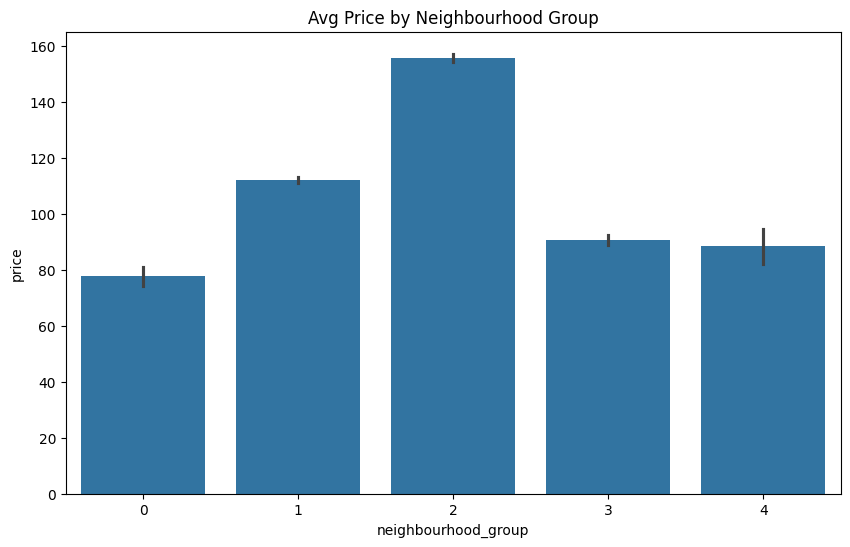

In [11]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Airbnb Price Distribution")
plt.show()

# Average price by neighbourhood group
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title("Avg Price by Neighbourhood Group")
plt.show()

# **Model Building**

In [12]:
# Select features
features = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365']
X = df[features]
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 44.48985566244666
RMSE: 65.10846971452574


# **Mapping Listings**

In [14]:
import folium

map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
for i, row in df.head(500).iterrows():
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=2,
        popup=f"${row['price']}",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(map_nyc)

map_nyc.save('nyc_airbnb_map.html')